In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
def load_dataset(path_to_file):
    df=pd.read_csv(path_to_file)
    return df

In [6]:
def standardize(df):
    scaler=StandardScaler()
    df_std=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    df_std[df.columns[-1]]=df[df.columns[-1]]
    return df_std

In [19]:
def train_test(df):
    X=df.drop(df.columns[-1],axis=1)
    y=df[df.columns[-1]]
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
    return([XTrain,XTest,yTrain,yTest])

In [8]:
def classification(k,XTrain,yTrain,XTest):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(XTrain, yTrain)
    yPred = knn.predict(XTest)
    return yPred

In [9]:
def percentage_accuracy(yPred,yTest):
    return(accuracy_score(yTest, yPred))

In [10]:
def confusion_matrixp(yPred,yTest):
    return(confusion_matrix(yTest,yPred))

In [20]:
def main():
    df=load_dataset("../files/pima-indians-diabetes.csv")
    dfStd=standardize(df)
    XTrain=train_test(dfStd)[0]
    XTest=train_test(dfStd)[1]
    yTrain=train_test(dfStd)[2]
    yTest=train_test(dfStd)[3]

    k = range(1,22,2)
    accuracies=[]
    for i in k:
        print("k = ",i)
        yPred=classification(i,XTrain,yTrain,XTest)
        print(confusion_matrixp(yPred,yTest))
        print(percentage_accuracy(yPred,yTest))
        accuracies.append(percentage_accuracy(yPred,yTest))
        print("\n")
    #print(s.index(np.max(s))*2+1)
    print("\n")
    plt.plot(range(1,22,2),accuracies,color='b')
    plt.xlabel("Value of k")
    plt.ylabel("Accuracy")
    plt.show()

k =  1
[[108  43]
 [ 44  36]]
0.6233766233766234


k =  3
[[123  28]
 [ 39  41]]
0.70995670995671


k =  5
[[119  32]
 [ 39  41]]
0.6926406926406926


k =  7
[[123  28]
 [ 37  43]]
0.7186147186147186


k =  9
[[121  30]
 [ 39  41]]
0.7012987012987013


k =  11
[[121  30]
 [ 39  41]]
0.7012987012987013


k =  13
[[125  26]
 [ 40  40]]
0.7142857142857143


k =  15
[[128  23]
 [ 41  39]]
0.7229437229437229


k =  17
[[129  22]
 [ 41  39]]
0.7272727272727273


k =  19
[[131  20]
 [ 39  41]]
0.7445887445887446


k =  21
[[132  19]
 [ 38  42]]
0.7532467532467533






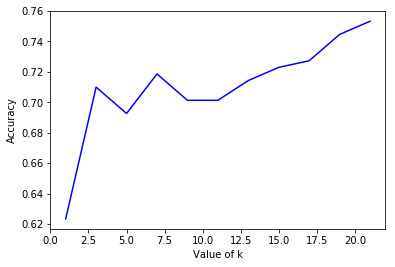

In [21]:
if __name__ == "__main__":
    main()